In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.

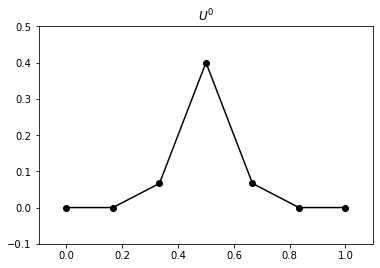

In [3]:
plt.ioff()

# initialize conditions ##############################################
J = np.linspace(0,1,7)
M = np.linspace(0, 0.4, 11)
v = 0.05
h = J[1]-J[0]
k = M[1]-M[0]
lamb = v*k/(h**2)

# calculate initial U ################################################
f_x = lambda x:2*np.maximum(0.2-np.abs(x-0.5), 0.)
U = np.array([f_x(j) for j in J])
U[0] = 0.
U[-1] = 0.
U_splice = np.copy(U)

# create A matrix used in further calculations #######################
A_diag = np.diag(np.full(len(U_splice), 1-2*lamb))
A_diag[0][0] = 1.
A_diag[-1][-1] = 1.
A_bottom = np.diag(np.full(len(U_splice) - 1, lamb), -1)
A_bottom[-1][-2] = 0
A_top = np.diag(np.full(len(U_splice) - 1, lamb), 1)
A_top[0][1] = 0
A = A_diag + A_bottom + A_top

# use A matrix to calculate additional U #############################
for i in range(1, len(M)):
    U_next = A@U_splice
    U = np.vstack((U, U_next))
    U_splice = np.copy(U[-1])
    
# plot results #######################################################
plt.plot(J, U[0], 'o-', color='black')
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 0.5))
plt.title('$U^0$')
plt.show()

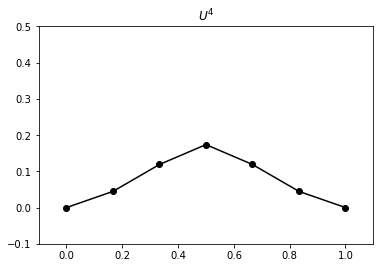

In [4]:
plt.ioff()
plt.plot(J, U[-1], 'o-', color='black')
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 0.5))
plt.title('$U^4$')
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


In [5]:
plt.ioff()

# initialize conditions ##############################################
J = np.linspace(-12.,12.,141)
M = np.linspace(0, 1.0, 71)
v = 1.
h = J[1]-J[0]
k = M[1]-M[0]
lamb = v*k/(h**2)

fig = plt.figure()
fig.suptitle('Numerical Solution with 140 in $x$, 70 in $t$')
ax = fig.add_subplot(111)
ax.set_xlim((-12., 12.))
ax.set_ylim((-0.1, 1.1))
line, = plt.plot([], [], color='black')

# calculate initial U ################################################
f_x = lambda x:np.maximum(1.-x**2, 0.)
U = np.array([f_x(j) for j in J])
U[0] = 0.
U[-1] = 0.
U_splice = np.copy(U)

# create A matrix used in further calculations #######################
A_diag = np.diag(np.full(len(U_splice), 1-2*lamb))
A_diag[0][0] = 1.
A_diag[-1][-1] = 1.
A_bottom = np.diag(np.full(len(U_splice) - 1, lamb), -1)
A_bottom[-1][-2] = 0
A_top = np.diag(np.full(len(U_splice) - 1, lamb), 1)
A_top[0][1] = 0
A = A_diag + A_bottom + A_top

# use A matrix to calculate additional U #############################
for i in range(1, len(M)):
    U_next = A@U_splice
    U = np.vstack((U, U_next))
    U_splice = np.copy(U[-1])
    
# embed animation ####################################################
def update(i):
    line.set_data(J, U[i])
    return U

ani = animation.FuncAnimation(fig, update, frames=range(71), interval=25)
HTML(ani.to_html5_video())

In [6]:
plt.ioff()

# initialize conditions ##############################################
J = np.linspace(-12.,12.,141)
M = np.linspace(0, 1.0, 67)
v = 1.
h = J[1]-J[0]
k = M[1]-M[0]
lamb = v*k/(h**2)

fig = plt.figure()
fig.suptitle('Numerical Solution with 140 in $x$, 66 in $t$')
ax = fig.add_subplot(111)
ax.set_xlim((-12., 12.))
ax.set_ylim((-0.1, 1.1))
line, = plt.plot([], [], color='black')

# calculate initial U ################################################
f_x = lambda x:np.maximum(1.-x**2, 0.)
U = np.array([f_x(j) for j in J])
U[0] = 0.
U[-1] = 0.
U_splice = np.copy(U)

# create A matrix used in further calculations #######################
A_diag = np.diag(np.full(len(U_splice), 1-2*lamb))
A_diag[0][0] = 1.
A_diag[-1][-1] = 1.
A_bottom = np.diag(np.full(len(U_splice) - 1, lamb), -1)
A_bottom[-1][-2] = 0
A_top = np.diag(np.full(len(U_splice) - 1, lamb), 1)
A_top[0][1] = 0
A = A_diag + A_bottom + A_top

# use A matrix to calculate additional U #############################
for i in range(1, len(M)):
    U_next = A@U_splice
    U = np.vstack((U, U_next))
    U_splice = np.copy(U[-1])
    
# embed animation ####################################################
def update(i):
    line.set_data(J, U[i])
    return U

ani = animation.FuncAnimation(fig, update, frames=range(67), interval=25)
HTML(ani.to_html5_video())

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [7]:
def heat_cn(nu,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    # initialize conditions ##############################################
    J = np.linspace(xbounds[0], xbounds[1], xsteps)
    M = np.linspace(tbounds[0], tbounds[1], tsteps)
    h = J[1]-J[0]
    k = M[1]-M[0]
    lamb = nu*k/(2*(h**2))

    # calculate initial U ################################################
    U = np.array([f(j) for j in J])
    U[0] = 0.
    U[-1] = 0.
    U_splice = np.copy(U)
    
    # create A and B matrices used in further calculations ###############
    A_diag = np.diag(np.full(len(U_splice), 1-2*lamb))
    A_diag[0][0] = 1.
    A_diag[-1][-1] = 1.
    A_bottom = np.diag(np.full(len(U_splice) - 1, lamb), -1)
    A_bottom[-1][-2] = 0
    A_top = np.diag(np.full(len(U_splice) - 1, lamb), 1)
    A_top[0][1] = 0
    A = A_diag + A_bottom + A_top
    
    B_diag = np.diag(np.full(len(U_splice), 1+2*lamb))
    B_diag[0][0] = 1.
    B_diag[-1][-1] = 1.
    B_bottom = np.diag(np.full(len(U_splice) - 1, -lamb), -1)
    B_bottom[-1][-2] = 0.
    B_top = np.diag(np.full(len(U_splice) - 1, -lamb), 1)
    B_top[0][1] = 0.
    B = B_diag + B_bottom + B_top
    B_inv = np.linalg.inv(B)
    
    # use A and B matrices to calculate additional U #####################
    for i in range(1, len(M)):
        U_next = B_inv@A@U_splice
        U = np.vstack((U, U_next))
        U_splice = np.copy(U[-1])
    
    # return resulting U matrix ##########################################
    return U

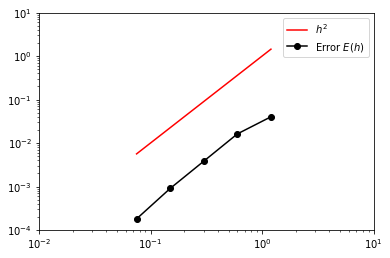

In [9]:
# set up initial conditions ##########################################
nu = 1.
f = lambda x:np.maximum(1.-x**2, 0)
xbounds = (-12., 12.)
tbounds = (0., 1.)
num_steps = [21, 41, 81, 161, 321, 641]

# get step sizes for each number of steps ############################
def get_stepsizes(num_steps):
    get_linspace = lambda x:np.linspace(-12., 12., x)
    h_vals = []
    for steps in num_steps:
        linspace = get_linspace(steps)
        h_vals.append(linspace[1]-linspace[0])
    return h_vals

step_sizes = get_stepsizes(num_steps)

# calculate U at t=1 for different step sizes ########################
U_t1 = [heat_cn(nu, f, xbounds, tbounds, steps, steps)[-1] for steps in num_steps]

# get the comparable indeces for each differently sized approximation 
linspaces = [np.linspace(-12., 12., steps) for steps in num_steps]

def find_nearest(array, value):
    return (np.abs(array - value)).argmin()
    
indeces_20 = [find_nearest(linspaces[-1], val) for val in linspaces[0]]
indeces_40 = [find_nearest(linspaces[-1], val) for val in linspaces[1]]
indeces_80 = [find_nearest(linspaces[-1], val) for val in linspaces[2]]
indeces_160 = [find_nearest(linspaces[-1], val) for val in linspaces[3]]
indeces_320 = [find_nearest(linspaces[-1], val) for val in linspaces[4]]
   
# compute the error values ###########################################
e_20 = np.linalg.norm(U_t1[0] - U_t1[-1][indeces_20], ord=np.inf)
e_40 = np.linalg.norm(U_t1[1] - U_t1[-1][indeces_40], ord=np.inf)
e_80 = np.linalg.norm(U_t1[2] - U_t1[-1][indeces_80], ord=np.inf)
e_160 = np.linalg.norm(U_t1[3] - U_t1[-1][indeces_160], ord=np.inf)
e_320 = np.linalg.norm(U_t1[4] - U_t1[-1][indeces_320], ord=np.inf)
error_vals = [e_20, e_40, e_80, e_160, e_320]

# plot the results ###################################################
plt.loglog(step_sizes[:-1], [x**2 for x in step_sizes[:-1]], color='red', label='$h^2$')
plt.loglog(step_sizes[:-1], error_vals, 'o-', color='black', label='Error $E(h)$')
plt.xlim((10e-3, 10e0))
plt.ylim((10e-5, 10e0))
plt.legend()
plt.show()